<a href="https://colab.research.google.com/github/UmarKhattab09/StockPrediction/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project
Prediction of stock prices



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Step #1: Load your data
url = 'https://drive.google.com/file/d/1oxcX_bZJ3358VQw54ktQsEJNbh1NYy77/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)


### Importing DataSet

In [ ]:
df.head()

,date,open,high,low,close,adj_close,volume
0,1962-01-02 00:00:00-05:00,0.263021,0.270182,0.263021,0.263021,0.046041,806400
1,1962-01-03 00:00:00-05:00,0.259115,0.259115,0.253255,0.257161,0.045016,1574400
2,1962-01-04 00:00:00-05:00,0.257813,0.261068,0.257813,0.259115,0.045358,844800
3,1962-01-05 00:00:00-05:00,0.259115,0.262370,0.252604,0.253255,0.044332,1420800
4,1962-01-08 00:00:00-05:00,0.251302,0.251302,0.245768,0.250651,0.043876,2035200


### DataSet Information
- Date -- > Date of Trading
- Open -- > Opening price of the day
- high -- > Highest Price of the Day
- Low  -- > Lowest Price of the day
- close --> Closing price of the day
- adj_close --> Adjusted Closing Price(accounts for splits/divdends)
-Volume --< Total Shares traded on the day

### DataChecks to Perform
- check Missing values
- check data type
- check basic statistics of data
- check shape of data

In [ ]:
df.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [ ]:
df.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
adj_close,float64
volume,int64


In [ ]:
df.describe()

,open,high,low,close,adj_close,volume
count,15930.000000,15930.000000,15930.000000,15930.000000,15930.000000,1.593000e+04
mean,18.476707,18.625024,18.325447,18.481559,12.860345,9.340502e+06
std,19.461582,19.601645,19.317982,19.464715,16.691945,7.958782e+06
min,0.192708,0.193359,0.182292,0.192057,0.034086,7.680000e+04
25%,0.888021,0.895833,0.880208,0.888021,0.223946,3.120000e+06
50%,10.531250,10.640625,10.468750,10.531250,4.828978,8.094800e+06
75%,32.000000,32.375000,31.625000,32.000000,17.417218,1.330348e+07
max,73.300003,73.949997,72.320000,73.180000,73.180000,1.241690e+08


In [ ]:
df.shape

(15930, 7)

In [ ]:
df['next_close'] = df['close'].shift(-1)
df.tail()
#Doing this cause a NaN value in the end. Filling it with Mean

,date,open,high,low,close,adj_close,volume,next_close
15925,2025-04-10 00:00:00-04:00,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,71.430000
15926,2025-04-11 00:00:00-04:00,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,72.449997
15927,2025-04-14 00:00:00-04:00,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,71.860001
15928,2025-04-15 00:00:00-04:00,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,71.680000
15929,2025-04-16 00:00:00-04:00,72.360001,72.669998,71.389999,71.680000,71.680000,15273200,NaN


In [ ]:
df['next_close'].fillna(71, inplace=True)


In [ ]:
df.tail()

,date,open,high,low,close,adj_close,volume,next_close
15925,2025-04-10 00:00:00-04:00,70.190002,71.209999,68.980003,70.760002,70.760002,22450200,71.430000
15926,2025-04-11 00:00:00-04:00,70.910004,71.849998,70.540001,71.430000,71.430000,19988200,72.449997
15927,2025-04-14 00:00:00-04:00,71.300003,72.660004,70.930000,72.449997,72.449997,13930200,71.860001
15928,2025-04-15 00:00:00-04:00,72.620003,72.629997,71.720001,71.860001,71.860001,14965500,71.680000
15929,2025-04-16 00:00:00-04:00,72.360001,72.669998,71.389999,71.680000,71.680000,15273200,71.000000


### Data Visualizations


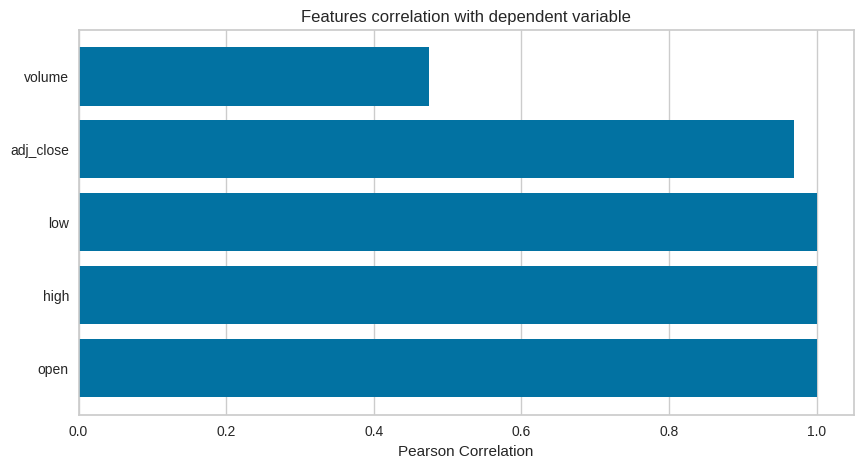

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare features and label
features = df[['open','high','low','adj_close','volume']]
label = df["close"]


# Step 2: Correctly assign feature names
feature_names = features.columns.to_list()

# Step 3: Instantiate the visualizer with correct labels
visualizer = FeatureCorrelation(labels=feature_names)

# Step 4: Visualize
plt.rcParams['figure.figsize'] = (10, 5)
visualizer.fit(features, label)
visualizer.show()


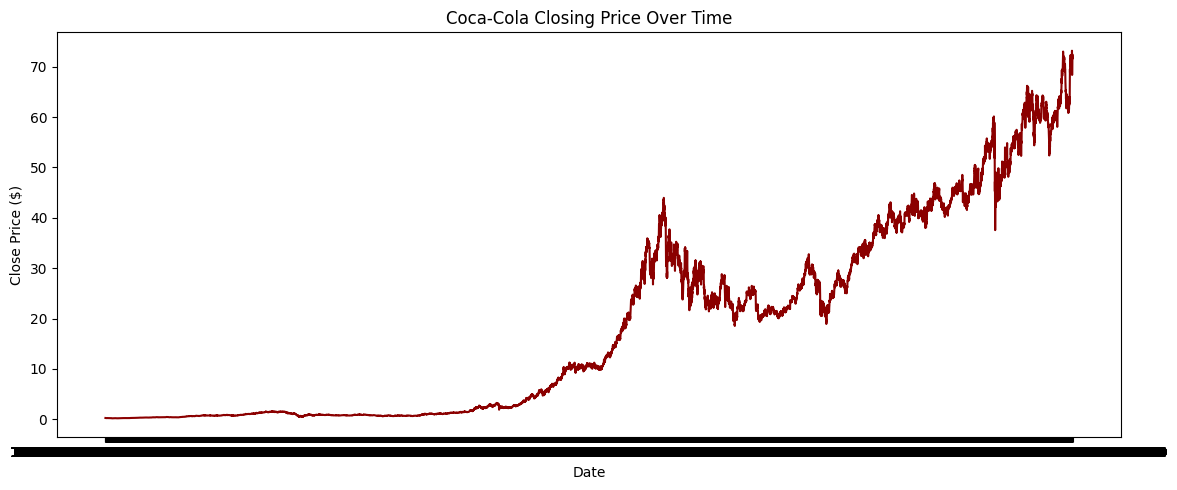

In [ ]:
# 1. Close Price Over Time
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['close'], color='darkred')
plt.title('Coca-Cola Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.tight_layout()
plt.show()

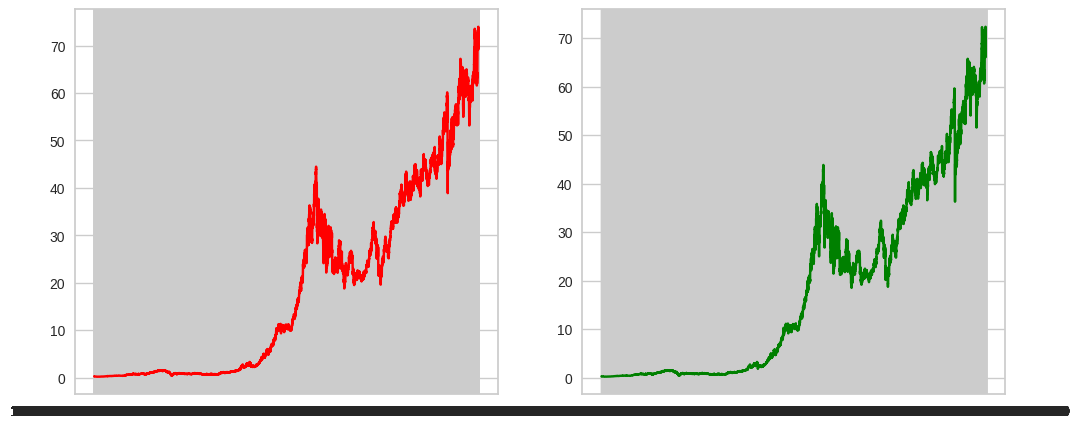

In [ ]:
#2.Low Price and High Price
fig, ax = plt.subplots(1,2,figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(df['date'], df['high'], color='red')
plt.subplot(1,2,2)
plt.plot(df['date'], df['low'], color='green')

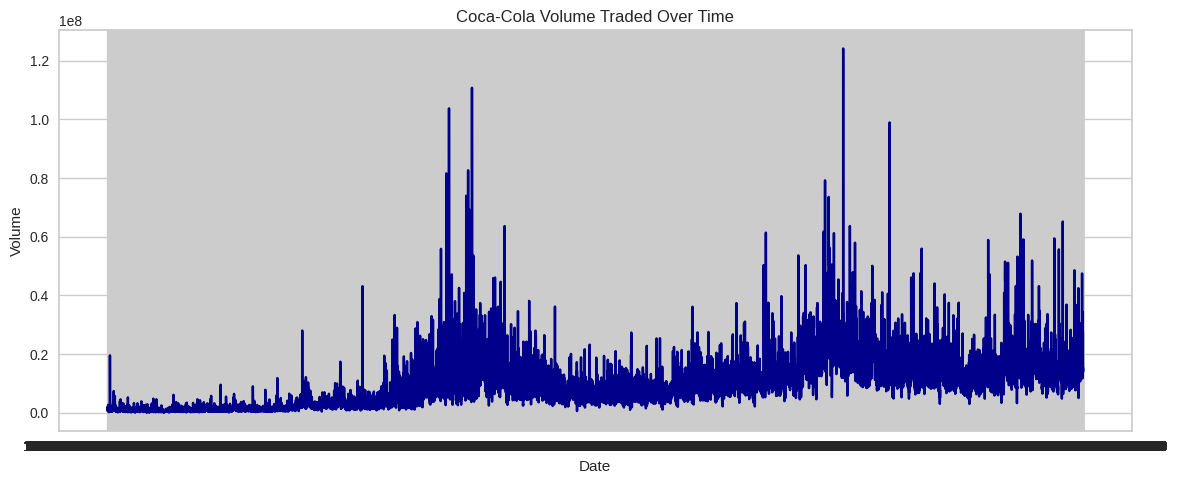

In [ ]:
# 3. Volume Price Over Time
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['volume'], color='darkblue')
plt.title('Coca-Cola Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

In [ ]:
df['convert'] = pd.to_datetime(df['date'],utc=True)
df['year'] = df['convert'].dt.year


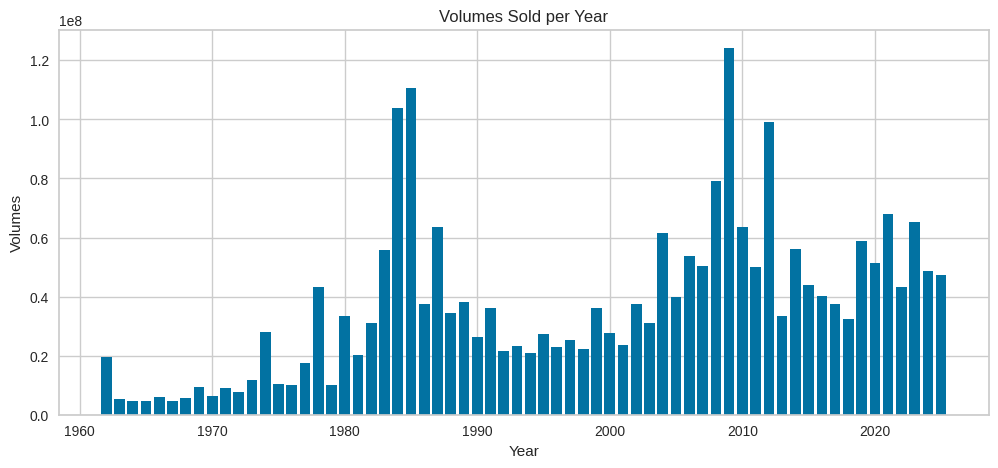

In [ ]:
###5. LAST 30 DAYS
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(df['year'], df['volume'])
ax.set_xlabel('Year')
ax.set_ylabel('Volumes')
ax.set_title('Volumes Sold per Year')

plt.show()

#### Insights
- I believe that the graph doesn't have any difference because the values difference is very small
- HIGH,LOW,CLOSE do not have any big difference between them.
- The amount of Volume sold have gradually increased, with some peaks during the time.

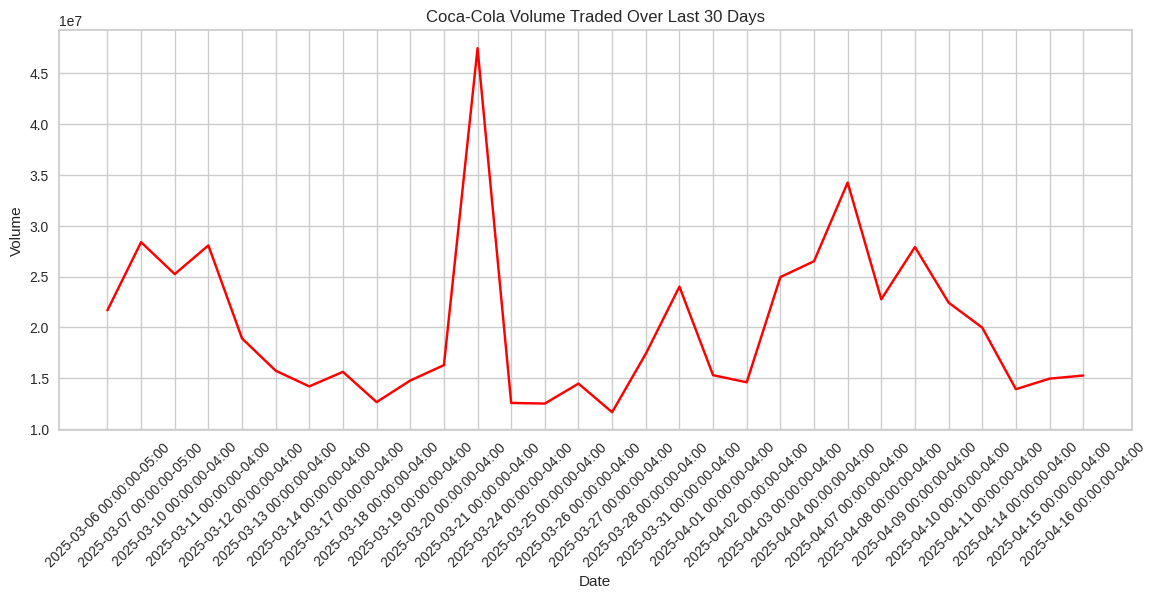

In [ ]:
###5. LAST 30 DAYS
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(df['date'][-30:], df['volume'][-30:], color='red')
plt.title('Coca-Cola Volume Traded Over Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

- In the Last 30 Days, The volume is fluctuating

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
df.head()

,date,open,high,low,close,adj_close,volume,next_close,convert,year
0,1962-01-02 00:00:00-05:00,0.263021,0.270182,0.263021,0.263021,0.046041,806400,0.257161,1962-01-02 05:00:00+00:00,1962
1,1962-01-03 00:00:00-05:00,0.259115,0.259115,0.253255,0.257161,0.045016,1574400,0.259115,1962-01-03 05:00:00+00:00,1962
2,1962-01-04 00:00:00-05:00,0.257813,0.261068,0.257813,0.259115,0.045358,844800,0.253255,1962-01-04 05:00:00+00:00,1962
3,1962-01-05 00:00:00-05:00,0.259115,0.262370,0.252604,0.253255,0.044332,1420800,0.250651,1962-01-05 05:00:00+00:00,1962
4,1962-01-08 00:00:00-05:00,0.251302,0.251302,0.245768,0.250651,0.043876,2035200,0.255208,1962-01-08 05:00:00+00:00,1962


In [ ]:
# separate dataset into train and test
X = df.drop(columns=['date','close','adj_close','convert','year'],axis=1)
y = df['next_close']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12744, 5), (3186, 5))

### Models Used
- Decision Tree Regressor
- Random Forest Regressor
- K-Neighbhors Regressor
- Linear Regression
- Lasso & Ridge

### Metrics Used
- Mean Absolute Error
- Root Mean Square Error
- R2 Score

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
#
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

predicteddataframe= pd.DataFrame(columns=['Actual_Close','Predicted_Close'])
predicteddataframe['Actual_Close']=y_test
predicteddataframe['Predicted_Close']=y_test_pred
print(predicteddataframe.head())

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

### Preparing for Anova
rmse_rf = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=0.2)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_rf.append(rmse)

       Actual_Close  Predicted_Close
8010      10.781250        10.781250
399        0.249349         0.249378
3557       0.898438         0.898477
15884     68.709999        68.438301
2679       1.419271         1.418620
Model performance for Training set
- Root Mean Squared Error: 0.0058
- Mean Absolute Error: 0.0016
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0131
- Mean Absolute Error: 0.0042
- R2 Score: 1.0000


In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
#
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

predicteddataframe= pd.DataFrame(columns=['Actual_Close','Predicted_Close'])
predicteddataframe['Actual_Close']=y_test
predicteddataframe['Predicted_Close']=y_test_pred
print(predicteddataframe.head())

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

### Preparing for Anova
rmse_dt = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=0.2)

    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_dt.append(rmse)

       Actual_Close  Predicted_Close
6127       2.270833         2.268229
11963     24.645000        24.650000
1659       0.760417         0.760417
8757      24.375000        24.375000
9684      27.218750        27.225000
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0204
- Mean Absolute Error: 0.0051
- R2 Score: 1.0000


In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
#
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

predicteddataframe= pd.DataFrame(columns=['Actual_Close','Predicted_Close'])
predicteddataframe['Actual_Close']=y_test
predicteddataframe['Predicted_Close']=y_test_pred
print(predicteddataframe.head())

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))


### Preparing for Anova
rmse_lr = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_lr.append(rmse)

       Actual_Close  Predicted_Close
8010      10.781250        10.781250
399        0.249349         0.249349
3557       0.898438         0.898438
15884     68.709999        68.709999
2679       1.419271         1.419271
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
#
model = Lasso()
model.fit(X_train, y_train)
warnings.filterwarnings('ignore')
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

predicteddataframe= pd.DataFrame(columns=['Actual_Close','Predicted_Close'])
predicteddataframe['Actual_Close']=y_test
predicteddataframe['Predicted_Close']=y_test_pred
print(predicteddataframe.head())

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

### Preparing for Anova
rmse_lasso = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=0.2)

    model = Lasso()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_lasso.append(rmse)

       Actual_Close  Predicted_Close
8010      10.781250        10.788319
399        0.249349         0.276439
3557       0.898438         0.932743
15884     68.709999        67.772270
2679       1.419271         1.435551
Model performance for Training set
- Root Mean Squared Error: 0.2951
- Mean Absolute Error: 0.1627
- R2 Score: 0.9998
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2948
- Mean Absolute Error: 0.1663
- R2 Score: 0.9998


In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
#
model = Ridge()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

predicteddataframe= pd.DataFrame(columns=['Actual_Close','Predicted_Close'])
predicteddataframe['Actual_Close']=y_test
predicteddataframe['Predicted_Close']=y_test_pred
print(predicteddataframe.head())

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

### Preparing for Anova
rmse_ridge = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=0.2)

    model = Ridge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_ridge.append(rmse)

       Actual_Close  Predicted_Close
8010      10.781250        10.781301
399        0.249349         0.249349
3557       0.898438         0.898435
15884     68.709999        68.708747
2679       1.419271         1.419261
Model performance for Training set
- Root Mean Squared Error: 0.0002
- Mean Absolute Error: 0.0001
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0002
- Mean Absolute Error: 0.0001
- R2 Score: 1.0000


In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

predicteddataframe= pd.DataFrame(columns=['Actual_Close','Predicted_Close'])
predicteddataframe['Actual_Close']=y_test
predicteddataframe['Predicted_Close']=y_test_pred
print(predicteddataframe.head())

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

### Preparing for Anova
rmse_knr = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=0.2)

    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_knr.append(rmse)

       Actual_Close  Predicted_Close
8010      10.781250         4.089583
399        0.249349         0.248112
3557       0.898438         3.840039
15884     68.709999        16.347813
2679       1.419271         0.493750
Model performance for Training set
- Root Mean Squared Error: 13.2993
- Mean Absolute Error: 9.2693
- R2 Score: 0.5281
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 16.8257
- Mean Absolute Error: 11.7413
- R2 Score: 0.2845


In [ ]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_stat, p_value = f_oneway(rmse_rf, rmse_dt, rmse_lr, rmse_lasso, rmse_ridge, rmse_knr)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")


F-statistic: 326682.6348
P-value: 0.0000


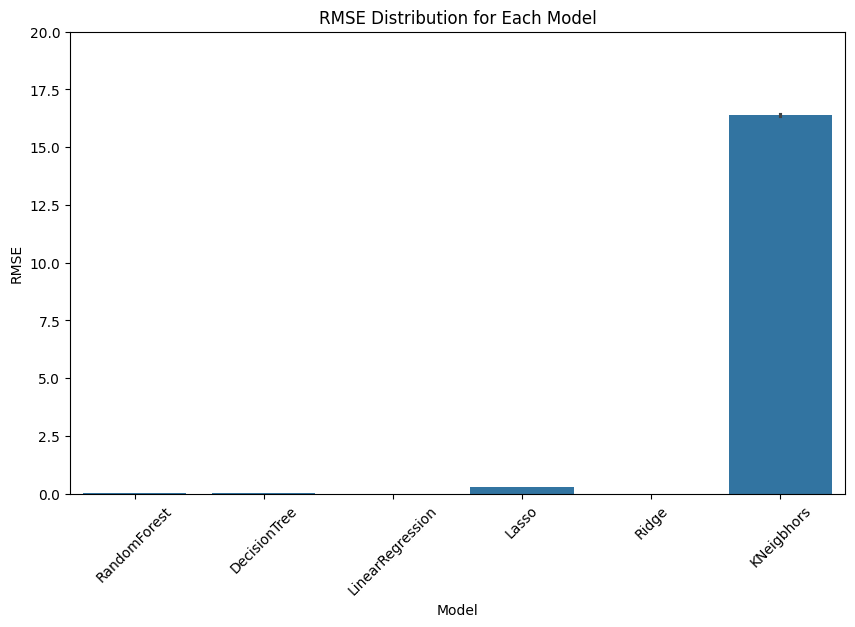

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine results into a DataFrame
df_anova = pd.DataFrame({
    'RandomForest': rmse_rf,
    'DecisionTree': rmse_dt,
    'LinearRegression': rmse_lr,
    'Lasso': rmse_lasso,
    'Ridge': rmse_ridge,
    "KNeigbhors" : rmse_knr
})

# Melt for seaborn
df_melt = df_anova.melt(var_name='Model', value_name='RMSE')

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, x='Model', y='RMSE')
plt.title('RMSE Distribution for Each Model')
plt.ylim(0, 20)  # Cap y-axis at 2

plt.xticks(rotation=45)
plt.show()